<a href="https://colab.research.google.com/github/akashchaurasiya406/Projects-/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
train_data =pd.read_csv('/content/train_data.csv')
test_data = pd.read_csv('/content/test_data.csv')

In [25]:
X_train = train_data[['Age','Sex','Fare','Pclass_1','Pclass_2','Pclass_3','Family_size','Title_1','Title_2','Title_3','Title_4','Emb_1','Emb_2','Emb_3']]
Y_train =train_data['Survived']
print(X_train.head())

      Age  Sex      Fare  Pclass_1  Pclass_2  Pclass_3  Family_size  Title_1  \
0  0.2750    1  0.014151         0         0         1          0.1        1   
1  0.4750    0  0.139136         1         0         0          0.1        1   
2  0.3250    0  0.015469         0         0         1          0.0        0   
3  0.4375    0  0.103644         1         0         0          0.1        1   
4  0.4375    1  0.015713         0         0         1          0.0        1   

   Title_2  Title_3  Title_4  Emb_1  Emb_2  Emb_3  
0        0        0        0      0      0      1  
1        0        0        0      1      0      0  
2        0        0        1      0      0      1  
3        0        0        0      0      0      1  
4        0        0        0      0      0      1  


In [18]:
X_test = test_data[['Age','Sex','Fare','Pclass_1','Pclass_2','Pclass_3','Family_size','Title_1','Title_2','Title_3','Title_4','Emb_1','Emb_2','Emb_3']]
Y_test =test_data['Survived']

In [26]:
X_train =X_train.values
Y_train =Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [27]:
X_train = X_train.T
Y_train = Y_train.reshape(1,X_train.shape[1])

X_test =X_test.T
Y_test =Y_test.reshape(1,X_test.shape[1])


In [30]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)


Shape of X_train: (14, 792)
Shape of Y_train: (1, 792)
Shape of X_test: (14, 100)
Shape of Y_test: (1, 100)


In [32]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [54]:
def model(X, Y, learning_rate, iterations):
    m = X.shape[1]
    n = X.shape[0]
    W = np.zeros((n, 1))
    B = 0
    cost_list = []

    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        cost = -(1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
        dW = (1/m) * np.dot(A-Y, X.T)
        dB = (1/m) * np.sum(A-Y)

        W = W - learning_rate * dW.T
        B = B - learning_rate * dB

        cost_list.append(cost)

        if i % (iterations // 10) == 0:
            print("Cost after", i, "iterations is:", cost)

    return W, B, cost_list




In [55]:
iterations = 10000
learning_rate = 0.001
W,B,cost_list =model(X_train,Y_train,learning_rate,iterations)

Cost after 0 iterations is: 0.6931471805599452
Cost after 1000 iterations is: 0.6244432722630885
Cost after 2000 iterations is: 0.5960912298015468
Cost after 3000 iterations is: 0.5779353093775446
Cost after 4000 iterations is: 0.5637521766039814
Cost after 5000 iterations is: 0.5519290637882864
Cost after 6000 iterations is: 0.5418596447150182
Cost after 7000 iterations is: 0.5332029034006912
Cost after 8000 iterations is: 0.5257144002558769
Cost after 9000 iterations is: 0.5192017187080661


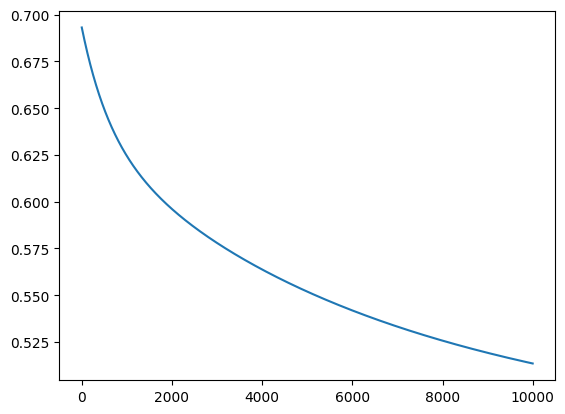

In [57]:
plt.plot(np.arange(iterations),cost_list)
plt.show()

In [58]:
iterations = 10000
learning_rate = 0.001
W,B,cost_list =model(X_test,Y_test,learning_rate,iterations)

Cost after 0 iterations is: 0.6931471805599453
Cost after 1000 iterations is: 0.6128759075024163
Cost after 2000 iterations is: 0.5821362810486653
Cost after 3000 iterations is: 0.5630114814998656
Cost after 4000 iterations is: 0.5479694834891633
Cost after 5000 iterations is: 0.535177684524509
Cost after 6000 iterations is: 0.5240203944064599
Cost after 7000 iterations is: 0.5141850745232294
Cost after 8000 iterations is: 0.505456598989583
Cost after 9000 iterations is: 0.49766581592191034


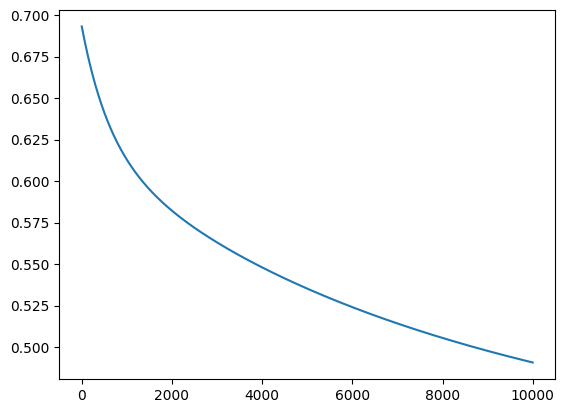

In [59]:
plt.plot(np.arange(iterations),cost_list)
plt.show()